# Introduction to Algorithms
Step 2 of 6

Topics Covered:
* How to analyze the time complexity of an algorithm
* How to analyze the space complexity of an algorithm
* Techniques to trade memory for speed

## Time Complexity of Algorithms
Here, we will learn how to analyze how good an algorithm is in terms of <em>speed</em> and <em>memory</em>. Simply put, an algorithm is a program or function that solves some specific problem. For example, a sorting algorithm is an algorithm that, given a list of values, outputs that same list of values but rearranges them in increasing (or decreasing) order.

For any given problem, there are numerous ways to write an algorithm that solves it. In this course, you'll learn how to compare these algorithms and find the one that will perform the best.

Let's start by writing an algorithm that, given a list of numbers, outputs the maximum value of that list. After all, before we can start analyzing algorithms, we need to have some algorithms to analyze.

In [1]:
## Implement basic maximum function
test_values = [4, 3, 5, 6, 2, 1]

def maximum(values):
    answer = None
    for value in values:
        if answer == None or value > answer:
            answer = value
    return answer

max_value = maximum(test_values)
print(max_value)

6


### Measuring the Execution Time
On this screen, we're going to learn how to measure the execution time of a Python function. Ultimately, our goal is not to measure the time of a specific execution of an algorithm, but rather to analyze the algorithm and predict how the execution time will evolve as data grows larger.

Intuitively, the more data an algorithm needs to process, the more time it will take to run. What we are interested in is building a model that tells us by how much the execution time grows as we increase the amount of data. We call these models the time complexity of an algorithm. By analyzing the time complexity of an algorithm, we want to be able to answer questions like:

*If we double the data, do we double the execution time, do we quadruple it, or something else entirely?*

Our starting point will be measuring execution times because it will help us build valuable intuition. Let's start by learning how to measure the execution time of a Python function.

Python offers a few different ways to do this. In this mission, we will use the [time module](https://docs.python.org/3/library/time.html). Calling the `time.time()` function, we get the total number of seconds that have passed from January 1, 1970, until now (depending on your OS, this date might change, but that does not matter for what follows).

Try running the following code:

In [2]:
import time
print(time.time())

1606527492.4201968


In [3]:
# How old is this Dataquest lesson? Let's find out:
created = 1582797144.388745
current = time.time()
elapsed_days = (current - created) / (3600 * 24)
print(elapsed_days)

274.65680619734854


Using the `time.time()` function, we can measure the time a Python function takes to execute by computing the difference between the time just after the function finishes executing and the time just before it started executing. If we call the time just before the execution `start` and the time just after `end`, then the execution time of the function will be `end - start` — as shown in blue on the following diagram:
![execution time](https://dq-content.s3.amazonaws.com/476/time.png)

In [4]:
test_values = [num * 2 for num in range(1,1001,2)]

start = time.time()
max_value = maximum(test_values)
end = time.time()
runtime = end - start
print(runtime)

0.0


Just a single measurement doesn't help us understand how the maximum() function behaves in terms of execution time.

Let's make the input length vary from length 1 to 500 and collect the execution time for each of them. The goal is to have an insight into how the execution evolves as the length of the list grows.

To do our experiment, we will need to have input lists with sizes 1 to 500 to execute the maximum() function. One way to generate these inputs is to use the random module. This module provides, among other things, the random.randint() function that, given two integers a and b, outputs a random number between a and b (inclusive).

Using list comprehensions, we can use the random.randint() function to generate a random list of length 500 with values, say, from -1,000 to 1,000, as follows:

In [5]:
import random
values = [random.randint(-1000, 1000) for _ in range(500)]

Notice that we used the `_` notation in the above `for` loop. This is a notation that can be used when we do not use the iteration variable. It gives the exact same result that we would get using some variable name, but avoids having to find a name for something that we will not use.

Since we want to be able to generate inputs of lengths 1 to 500, it is convenient to define a function that takes as input a length and outputs a random list of the given length:

In [6]:
def gen_input(length):
    return [random.randint(-1000, 1000) for _ in range(length)]

In [7]:
times = []
for length in range(1,501):
    values = gen_input(length)
    start = time.time()
    maximum(values)
    end = time.time()
    runtime = end - start
    times.append(runtime)

The printed results are hard to read, so let's plot these times for visualizing how they are growing:
![runtime](https://dq-content.s3.amazonaws.com/476/plot1.png)
We can see some spikes on the execution times at some points. These are due to external factors such as CPU load, memory management, among others. However, despite the lack of accuracy of these measures, we can see a line forming underneath, which roughly describes how the execution time is increasing. This is shown in red in the following plot:

![runtime plot](https://dq-content.s3.amazonaws.com/476/plot2.png)

We can see that as the data increases, so does the execution time. This is not surprising since there is more data to process. However, this tells us more. It gives us an insight on the rate at which it is increasing. The red line is a straight line, which means that the time is growing somewhat proportionally with the data.

This is good news because it means that the execution time grows at the same rate as the data. Doubling the amount of data will double the amount of time needed to process it.

The purpose of this mission is to learn how to look at an algorithm and derive a mathematical expression for the red line. As mentioned before, we call such an expression the **time complexity of the algorithm**:

![time complexity model](https://dq-content.s3.amazonaws.com/476/real_vs_model.png)

### Measure `sum_values()` on inputs

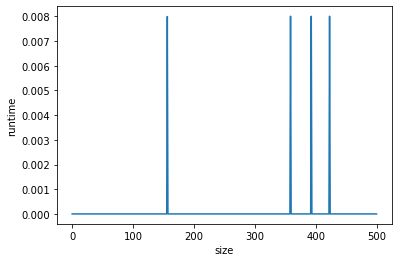

In [8]:
import time
import random
import matplotlib.pyplot as plt
%matplotlib inline

def plot_times(times):
    plt.plot(times)
    plt.ylabel('runtime')
    plt.xlabel('size')
    plt.show()

def sum_values(values):
    total = 0            
    for value in values: 
        total += value   
    return total  

def gen_input(length):
    return [random.randint(-1000, 1000) for _ in range(length)]

# add your code below
times = []
for length in range(1, 501):
    values = gen_input(length)
    start = time.time()
    sum_values(values)
    end = time.time()
    runtime = end - start
    times.append(runtime)

plot_times(times)

### Worst Case Execution Analysis

In our analysis, we needed to count how many times each line of code was executed. However, we cannot always do that. Consider for instance the `maximum()` function from before:

In [9]:
def maximum(values):
    answer = None
    for value in values:
        if answer == None or answer < value:
            answer = value
    return answer

How many times is the line answer = value executed? Well, that depends on the values list. The first time, it is always executed because answer is initially set to None. After that, it depends on the order of the elements in values.

For example, if values = [1, 2, 3, 4, 5] then, at every subsequent iteration, answer < value will be true, so the line will be executed one time for each value. On the other hand, if values = [5, 4, 3, 2, 1] then, the first time answer will be set to 5, and then the line will never be executed again.

We say that the first is a **worst-case** execution analysis and the latter a **best-case** execution analysis. When building a model for the execution time of an algorithm, we often focus on the worst case. There a few reasons for doing so:

1. We usually want to process data from a lot of different sources and, consequently, it turns out that the worst-case actually occurs quite often.
2. It provides an upper bound. By focusing on the worst-case when building the execution time model, we can guarantee that the executions times will always behave at most as badly as the models predicts. Imagine that you are selling an algorithm that 1% of the time takes one second, and 99% takes over one year. If you advertise it as taking one second (best case), your customers will not be very pleased.

**In practice, this means that when building the model, the number of executions that we set for each line of code is the maximum number of times that it can possibly be executed.**

With this in mind, let's build a model for the maximum() function and see whether it matches our experimental prediction.

In [10]:
def maximum(values):
    answer = None                            # c1, 1 time,  c1
    for value in values:                     # c2, N times, c2*N
        if answer == None or answer < value: # c3, N times, c3*N
            answer = value                   # c4, N times, c4*N
    return answer                            # c5, 1 time,  c5

Cleaning up the constants by renaming c2 + c3 + c4 as a and c1 + c5 as b, we again obtain a linear model aN + b , as expected. This confirms our previous experimental results on the `maximum()` function.

In [11]:
def count_zeros(values):
    count = 0            # c1 - once
    for value in values: # c2 - c2*n
        if value == 0:   # c3 - c3*n
            count += 1   # c4 - c4*n
    return count         # c5 - once

model1 = '(c1 + c2) * N + (c3 + c4 + c5)'
model2 = '(c2 + c3) * N + (c1 + c4 + c5)'
model3 = '(c2 + c3 + c4) * N + (c1 + c5)'

correct = model3

### Quadratic Complexity
So far, all the concrete functions that we analyzed had an execution time model that was linear, that is, of the form aN + b. Let's see an example where this is not the case. Consider the following `zero_sum()` function that counts the number of pairs of indexes whose values add up to 0.

In [12]:
def zero_sum(values):
    N = len(values)                          
    count = 0                               
    for i in range(N):                     
        for j in range(N):                    
            if values[i] + values[j] == 0: 
                count += 1                    
    return count

#### Build the Execution Time Model
1. Assign an unknown constant to each line of code.
2. Count how many times each line is executed. Let N denote the number of elements in the `values` list. Remember that we now consider the wrost case. In this case, we'll assume that the `if` condition is always true.
3. Multiply the constant execution time of each line by the number of times the line is executed.
4. Add all values together and group terms.

**Step 1**

In [13]:
def zero_sum(values):
    N = len(values)                        # c1                     
    count = 0                              # c2
    for i in range(N):                     # c3
        for j in range(N):                 # c4
            if values[i] + values[j] == 0: # c5
                count += 1                 # c6
    return count                           # c7

**Step 2**

In [14]:
def zero_sum(values):
    N = len(values)                        # c1, 1 time                     
    count = 0                              # c2, 1 time
    for i in range(N):                     # c3, N times
        for j in range(N):                 # c4, N * N times
            if values[i] + values[j] == 0: # c5, N * N times
                count += 1                 # c6, N * N times
    return count                           # c7, 1 time

Before we take the next step, let's make sure we understand why the for loop on j and inner lines are executed N2 times. By itself, the for loop on j is executed N times since it loops over N values. However, it is wrapped inside the for loop on i, which is also executed N times. Therefore, the total number of executions of the line containing the for loop on j is N × N = N2.

A general rule of thumb is that a for loop inside another will be executed N<sup>2</sup> times, a for loop inside two others will be executed N<sup>3</sup> times, and so on.

**Step 3**

In [15]:
def zero_sum(values):
    N = len(values)                        # c1, 1 time,      c1                     
    count = 0                              # c2, 1 time,      c2
    for i in range(N):                     # c3, N times,     c3 * N
        for j in range(N):                 # c4, N * N times, c4 * N^2
            if values[i] + values[j] == 0: # c5, N * N times, c5 * N^2
                count += 1                 # c6, N * N times, c6 * N^2
    return count                           # c7, 1 time,      c7

aN<sup>2</sup>+bN + c
![quadratic time](https://dq-content.s3.amazonaws.com/476/quadratic_time.png)

### Further Simplification
So far, we have analyzed algorithms with only a few lines of code, so the calculations did not get extremely complex. However, as algorithms become more complicated, this process can become quite complex and cumbersome.

Moreover, remember that we are only interested in seeing how much the execution time grows as data grows, not the exact execution time. With this in mind, we can simplify our analysis even further by dropping unnecessary information.

**1. Drop the line constants**

In previous examples, we started by assigning to each line of code a different constant expressing the time that line needs to execute. However, we only care about whether our final expression looks like aN + b (linear time complexity) or aN2 + bN + c (quadratic time complexity).

The exact values of a, b and c do not matter. What matters is whether we have a N2 term or not.

For this reason, we can safely ignore these constant times from now on. This is the same as treating each of these constants as having value 1.

In other words, we will just count how many times each line is executed:

In [16]:
def maximum(values):
    answer = None                            # 1 time
    for value in values:                     # N times
        if answer == None or answer < value: # N times
            answer = value                   # N times
    return answer                            # 1 time

Adding these terms, we get **3N + 2**

**2. Keep only the most significant term**
The next simplification step is to keep only the most significant term. By significant here, we mean the one that is growing the fastest. In the above expression we have two terms 3N and 2. The fastest-growing term is 3N since 2 is a constant. Another way to see this is that, as N becomes very big, adding 2 or not becomes less and less relevant because the value of 3N is so large when compared to 2.

We end up with: **3N + 2 => 3N**

![time(n)](https://dq-content.s3.amazonaws.com/476/times.png)

As you can see, the total time time(N) (purple curve) and the highest term N3 (blue curve) are very similar. Therefore, when analyzing the execution time of an algorithm, we can drop all but the most significant term (the one with the highest exponent).

**3. Drop the constant coefficient**
The final step is to drop the remaining constant coefficient, in the case of the maximum() function, the 3 from 3N. By doing this, we end up with a simple model for the execution time of the maximum() function: **3N => N**

Remember that we only care about the <u>rate of growth</u> of the execution time.

We denote a function whose simplification steps result in N by O(N). We say the function is **order of N** or **O of N**. In other words, a linear-time algorithm is an algorithm with time complexity O(N).

Let's consider another example. For function in our above experiment, with time(N) = N3 + 5N2 + 17N + 6 we would write O(N3). This means that its execution time grows at the same rate as the cube of the size of the input.

In the same way, if we apply these steps to the expression aN2 + bN + c we obtain N2. So a quadratic time algorithm is an algorithm whose time complexity is O(N2).

#### Practice: Analyze 2 functions' efficiency

**Function 1**

In [17]:
def min_max1(values):
    minimum = None                      # 1 time
    maximum = None                      # 1 time
    # loop once over the values         
    for value in values:                # N Times
        # check if minimum needs to be updated  
        if minimum == None or value < minimum:   # N Times
            minimum = value                      # N Times
        # check is maximum needs to be updated 
        if maximum == None or value > maximum:   # N Times
            maximum = value                      # N Times
    return minimum, maximum                # 1 Time

**Function 2**

In [18]:
def min_max2(values):
    # compute the minimum
    minimum = None                               # 1 Time
    for value in values:                         # N Times
        if minimum == None or value < minimum:   # N Times
            minimum = value                      # N Times
    # compute the maximum 
    maximum = None                               # 1 Times
    for value in values:                         # N Times
        if maximum == None or value > maximum:   # N Times
            maximum = value                      # N Times
    return minimum, maximum                      # 1 Time

There is a common misconception that the first function will be more efficient than the second one because it iterates over the values only once. Now that we understand how to analyze the time complexity of a Python function, we can see that this is not the case!

* min_max1 = O(N)
* min_max2 = O(N)

We conclude that both functions are order of N or O(N) , for short. Note that the fact that min_max1() is slightly faster ( 5N vs 6N ) should not be a major factor for preferring it over min_max2(). Unless you are doing highly specialized code that will run on a spaceship, for functions of the same order, you should favor factors such as:

* <em>Readability</em>: how easy the code is to read
* <em>Maintainability</em>: how easy it is to augment the code or re-use it

#### Analyzing a More Complex Function

In [19]:
def count_triples(values):
    count = 0                                               # 1 time
    N = len(values)                                         # 1 time
    for i in range(N):                                      # N times
        for j in range(N):                                  # N^2 times
            for k in range(N):                              # N^3 times
                if values[i] + values[j] + values[k] == 0:  # N^3
                    count += 1                              # N^3
    return count                                            # 1 time

coefficients = [3,1,1,3]
order = 'O(N^3)'

### Summary
We've learned:
* That slow algorithms will eventually become the bottleneck of applications regardless of technological advances on computers.
* How to measure the execution time of a Python function.
* How to generate random inputs.
* How to build a model to understand how the execution time of a function grows with the input data.
* How to simplify these models.

We've also leaned two types of complexity linear time complexity, O(N), and quadratic time complexity, O(N2). Linear time algorithms have an execution time that is proportional to the amount of data while quadratic time algorithms quadruple their execution time when data is doubled:
![complexity graph](https://dq-content.s3.amazonaws.com/476/linear_quadratic_complexity.png)

## Constant Time Complexity
Previously, we learned how to analyze the time complexity of an algorithm. We saw examples of linear time algorithms. The execution time of a linear time algorithm is proportional to the size of the data, O(N). We also saw an example of a quadratic time algorithm, which was an algorithm whose execution time is proportional to the square of the size of the dataset, O(N2).

In this mission, we will see another kind of time complexity: constant time complexity. We will also learn the core operations that a computer can perform and how a computer structures data into its memory.

More concretely, an algorithm with constant time complexity is an algorithm whose execution time does not depend on the data that it is processing. A constant time algorithm can be very slow; what characterizes it, is the fact that the time it takes is independent of the amount of data:
![constant time complexity](https://dq-content.s3.amazonaws.com/477/constant_time.png)

#### Recap: Find the Coefficients and Order of the Following Function:

In [20]:
def average(values):
    average = 0                         # 1
    for value in values:                # N
        average += value                # N
    return average / len(values)        # 1

coefficients = [2,2] 
order = "O(N)"

To recap, a constant-time algorithm is an algorithm whose time complexity does not depend on the data. In terms of Python, these are functions whose execution time does not depend on the input. The max_two() function that computes the maximum between two given values is one such example:

In [21]:
def max_two(a, b):
    if a >= b:
        return a
    return b

In [22]:
def max_two(a, b):
    if a >= b:   # 1
        return a # 1
    return b     # 1

We get a total of three line executions when we add these values. We denote the complexity of such an algorithm by O(1) and say that it's a <strong>constant time algorithm</strong>.
    
Classify each as either O(1) or otherwise:

In [23]:
# O(N)
def function1(N):
    for i in range(N):
        print(i)

# O(1)
def function2():
    for i in range(100000):
        print(i)

# O(1)
def function3(N):
    for i in range(100000):
        print(i)
        
constant1 = False
constant2 = True
constant3 = True

#### We Must Consider Sub-Functions to Perform Time Complexity Analysis
Consider the code:

In [24]:
def find_minimum(values):
    minimum = None
    for value in values:
        if minimum == None or value < minimum:
            minimum = value
    return minimum

def find_maximum(values):
    maximum = None
    for value in values:
        if maximum == None or value > maximum:
            maximum = value
    return maximum

def min_max2(values):
    minimum = find_minimum(values)
    maximum = find_maximum(values)
    return minimum, maximum

If we were to make a line execution count of the new implementation of min_max2(), we would get a constant time complexity:

In [25]:
def min_max2(values):
    minimum = find_minimum(values) # 1
    maximum = find_maximum(values) # 1
    return minimum, maximum        # 1

This is <strong>wrong!</strong> To fix this, we need to make sure that, when we perform a complexity analysis, we add the time complexity of the function calls.

In [26]:
def min_max2(values):
    minimum = find_minimum(values) # O(N)
    maximum = find_maximum(values) # O(N)
    return minimum, maximum        # 1

**Simplifying further, we can omit the O and use the value contained in parenthesis:**

In [27]:
def min_max2(values):
    minimum = find_minimum(values) # N
    maximum = find_maximum(values) # N
    return minimum, maximum        # 1

**Exercise:**
Perform a time complexity analysis on the following 3 functions:

In [28]:
def sum_values(values):
    total = 0            # 1
    for value in values: # N
        total += value   # N
    return total         # 1

def num_values(values):
    total = 0            # 1
    for _ in values:     # N
        total += 1       # N
    return total         # 1

def average(values):
    value_sum = sum_values(values)  # N
    num_values = num_values(values) # N
    return value_sum / num_values   # 1

### Lookout for "Hidden" Function Calls
Now, we can take into account the time complexities of function calls and avoid underestimating the time complexity of an algorithm. Are there any other special cases that we need to consider? The answer is both yes and no.

The reason why we cannot answer a simple no to this question is that Python offers a lot of syntactic sugars, which makes it hard to identify where we are calling functions. A syntactic sugar in a programming language is a shorthand notation that is used to write more concise code.

For example, when we write `values[4]` to access the value at index 4 in a list, we are actually calling the `list.__getitem__()` method. So, `values[4]` is a syntactic sugar (alternative notation) for `values.__getitem__(4)`.

A similar syntactic sugar is setting a value to a list index. The code `values[3] = 42` is actually a syntactic sugar for `values.__setitem__(3, 42)`.

* **List Comprehension** represents O(N) (at minimum)
* `values[4]` represents `values.__getitem__(4)`. This is done in O(1) time.

**Exercise:**
Perform time complexity analysis on the following 6 list comprehensions:

In [29]:
N = 10
M = 20

list1 = [_ for i in range(0)] # 'O(1)'
list2 = [i for i in range(3)] # 'O(1)'
list3 = [i * i for i in range(M)]  # 'O(M)'
list4 = [[i + j for j in range(M)] for i in range(N)]   # 'O(N + M)'
list5 = [min(list4[i]) for i in range(N)]   # 'O(N + M)'
list6 = [i for i in range(1000)] # 'O(1)'

complexity1 = 'O(1)'
complexity2 = 'O(N)'
complexity3 = 'O(M)'
complexity4 = 'O(N + M)'
complexity5 = 'O(N * M)'

# Example answer for list1
answer1 = complexity1
answer2 = complexity1 
answer3 = complexity3
answer4 = complexity5
answer5 = complexity5
answer6 = complexity1

### Fundamental Operations of a Computer
The fundamental operations that a computer can do are:
* Allocating a single memory location for a variable
* Reading and writing values in single memory location
* Basic arithmetic operations addition, subtraction, multiplication, and division on fixed bit length numbers
* Checking a single boolean condition
* Printing a character to the screen

In general, an algorithm takes some data and computes something out of it. In order to process data, we need a way to store and access that data into the computer memory. For this reason, it is important to understand how more complex data can be created, such as lists, strings and dictionaries. To do so, we need to understand how a computer can allocate memory.

We have learned in the first Python course that when we declare a variable in Python, the computer will allocate a position in its memory to store the value of the variable. The name that was used for that variable can then be used to access that value. For instance, imagine that we declare a variable named result with value 20, like so:

In [30]:
result = 20 # Constant time operation
values = [20, 13, 8, 11, 42, 4] # O(N) where N is the number of allocated positions.

**Single location:**
![memory allocation](https://dq-content.s3.amazonaws.com/477/memory_array1.svg)

**Continuous range (array):**
![array allocation](https://dq-content.s3.amazonaws.com/477/memory_array2.svg)

The cost of allocating an array in memory is O(N), where N is the number of allocated positions.

No matter how big the array is, the computer can access any position in constant time by jumping straight to the correct position. For this reason, accessing a list element at a specific index can be done in O(1).

In [31]:
values[3] # This is done in O(1) time

11

### How Python Appends Items to Lists
However, this efficiency comes at a cost. The reason why the computer is able to jump straight to a specific position is the fact that the range of allocated positions is contiguous (the memory locations are one next to the other inside the memory). This means that arrays must have a fixed length that is defined upon creation. If their length was to change later, the next positions might already be used by other variables, and data would be lost.

This means that we cannot append elements to an array. However, we can append elements to lists using the `list.append()` so how can this be?

When we append a new element to a list, Python will: 
1. Create a brand new array that is bigger than the previous one
2. Copy all elements previously stored in the old array
3. Write the new element just after the last one.
![append](https://dq-content.s3.amazonaws.com/477/memory_array3.png)

The copy process takes O(N) time, where N is the number of elements in the list at that time.

### Analyzing `append()`

Arrays are a rigid data structure whose length cannot be increased. For this reason, to append an element to a list, we need to allocate a new array of bigger length and copy all elements previously in it together with the new element that we want to add.

If not implemented carefully, this will result in an O(N) time complexity for the list.append() method. This is because, at each insertion, we'll need to copy all of the previously added elements.

#### Overcoming O(N)
There is a trick to overcome this. Instead of allocating an array with the exact number of elements in the list plus one, we create a bigger array, leaving some unused positions in the end. We also keep a variable that points to the first empty position in the array. Then, when we want to add a new element to the list, we add it to the first unused position in constant time.

However, as we keep adding elements, we will eventually fill all positions. At this point, we need to resize the array. Instead of increasing the length of the new array by one, we make it bigger than necessary. In this way, we will be able to add new elements in constant time for a while, before having to do another resize.

Imagine that we execute the following code:

In [32]:
values = []
values.append(0)
values.append(1)
values.append(2)
values.append(3)
values.append(4)

#### Resize Strategy: Double the Array Size
One resize strategy is to create a new array with double the length of the original whenever it becomes full. Here is an illustration of the underlying array used to store the values list:


<img src='https://dq-content.s3.amazonaws.com/477/list_append_2.svg' alt='Double Array Size' style='width: 700px;'/>

As you can see, by using more memory, this process reduces the number of times we will need to resize the array. Let's analyze what we lose in terms of memory and what we gain in terms of time complexity with this solution.

To answer the memory question, observe that, since we double the array capacity when it becomes full, it means that after the resize, at least half of the array is full. Therefore we use at most double the required memory.

To analyze the time complexity, we need to take another look. If we look at a single list.append() we still have O(N) complexity since, in the worse case, we need to resize the array. However, let's look at the total cost of adding N elements rather than a single element.

Let's do this experimentally. To do our experiment, we will pretend that we add elements to a list and keep track of the number of elements in the list, as well as the length that the underlying array would have. Given these two parameters, we can compute the cost of adding an element to a list using the following function:

In [33]:
def append_cost(array_length, list_length):
    if array_length == list_length:
        return array_length
    return 1

The first thing that we check is whether we need to resize the array. This happens when the length of the array and the list are the same. In this case, the cost is essentially O(array length). Otherwise, it is done in O(1).

The experiment will receive the number of elements to add as a parameter. Then, it will simulate adding elements to the list by keeping track of the list and array sizes. At each iteration, we will compute the cost with the above function and add it to the total cost. Remember, we want to evaluate the total cost of adding N elements.

In [34]:
def append_N_list_cost(N):
    array_length = 1 # Initially the array will have length 1
    list_length = 0  # Initially the list has 0 elements
    total_cost = 0   # This variable will keep track of the total cost
    for i in range(N):
        cost = append_cost(array_length, list_length)
        total_cost += cost
        # Update the array and list lengths
        if array_length == list_length:
            array_length *= 2
        list_length += 1
    return total_cost

Executing `append_N_list_cost()` returns the estimated cost of adding N elements to a list. 

Lets plot the results:

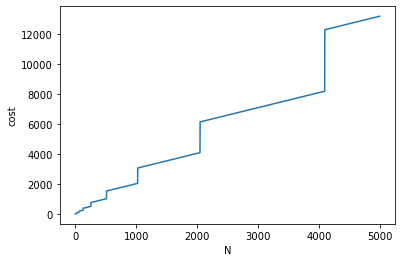

In [35]:
import matplotlib.pyplot as plt

def plot_costs(times):
    plt.plot(times, label='append cost')
    plt.ylabel('cost')
    plt.xlabel('N')
    plt.show()

costs = []
for N in range(5000):
    cost = append_N_list_cost(N)
    costs.append(cost)
plot_costs(costs)

It's not clear at first how this function is growing. It grows linearly, but then it sometimes jumps. These jumps correspond to the moments where we needed to double the array length. The next figure shows the same plot together with the functions 2N and 3N :

<img src='https://dq-content.s3.amazonaws.com/477/append_cost2.png' alt='linear plot' style='width=700px;'/>

As we can see, the cost of appending an element to a list is always between 2N and 3N. Since it's always smaller than 3N and 3N = O(N), this means the cost of appending N elements to a list is O(N).

#### Amortized Complexity
Since N operations cost O(N) , we can amortize the cost of a single operation by dividing the total cost by the number of operations. In this case, by dividing O(N) by N we get O(N) / N = O(1) for each list.append(). We then say that list.append() has **amortized complexity** of O(1).

In terms of execution time, having amortized complexity O(1) will yield the same results as if the complexity really was O(1). Think of this analysis as distributing the few costly operations amongst all executions of the method.

Here is a table with the time complexity of the most common list methods:

| Method   |  Description |	Complexity|
|----      |---            -|-----|
| len() |  Get the length of the list |	O(1) |
|append()  |  Add an element to the list |	O(1) |
| pop()	| Retrieve and remove the last element of the list| O(1)|
|remove(x)	| Remove the first ocurrence of x (if it exists)|	O(N)|
| insert(i) |	Insert the element at index i |	O(N) |



Because of this, <u>**we should only use lists when the operations that we need to use on the data are limited to list.append(), list.pop(), and looping over all list elements**</u>. If we need more complex operations, odds are that there is a more efficient data structure for storing the data.

In [36]:
def add_with_append(N):
    values = []
    for i in range(N):
        values.append(i)
    return values

def add_with_insert(N):
    values = []
    for i in range(N):
        values.insert(0, i)
    return values

# write code below
import time

start = time.time()
add_with_append(50000)
end = time.time()
time_append = end - start

start = time.time()
add_with_insert(50000)
end = time.time()
time_insert = end - start

quickest = min(time_insert, time_append)
slowest = max(time_insert, time_append)

difference = slowest / quickest

print(f'Appending 50,000 values took {time_append} seconds')
print(f'Inserting 50,000 values took {time_insert} seconds')
print(f'time_append was {difference:.2f} times faster than time_insert!')

Appending 50,000 values took 0.01599884033203125 seconds
Inserting 50,000 values took 1.7767853736877441 seconds
time_append was 111.06 times faster than time_insert!


Inserting is much slower than appending.

Dividing .365 by .003 we get 122, inferring that the `append()` was 122 times faster than the `insert()` method.

Computer processors are designed to manipulate fixed bit length numbers very efficiently. However, we've already learned in the third Python course that Python does not use fixed bit length integers and that numeric values can grow as large as the computer memory allows.

We learned, in this mission, that computers cannot manipulate arbitrarily large amounts of information in constant time. Since the size of numbers in Python can grow as large as the computer memory allows, we conclude that <u>arithmetic operations cannot be performed in constant time in Python</u>.

Arithmetic operations are yet another common example of hidden function calls in Python. The code `x + y` in Python is a syntactic sugar for `x.__add__(y)`. The same is true for other arithmetic operations. For example, `x * y` corresponds to `x.__mul__(y)`. The time complexity of doing an arithmetic operation between two integers depends on the number of digits required to represent them.

In [37]:
x = 3
y = 5
print(x + y)
# '+' calls the __add__() function
print(x.__add__(y))


8
8


The exact time complexities are relatively complex and not very useful for data science as a whole. The reason is that we hardly ever deal with values that require more than 64 bits. Manipulating numbers with at most 64 bits can be done in constant time, even in Python. Only fields like cryptography care about the complexity of handling very large numbers since they use them constantly.

Let's perform an experiment to verify that as the number of digits increases, so does the time need to compute the result of arithmetic operations.

Plotting the times of multiplying integers with an increasing number of digits:
![multiplying integers](https://dq-content.s3.amazonaws.com/477/multiply.png)
This shows that the execution time is not constant and increases as the number of digits increases. However, since most values that we deal with in data science are relatively small, we will always treat arithmetic operations between numeric values as constant-time operations.

Numbers are not the only objects over which we use arithmetic operations. We have seen that if x and y are integers, then x + y is actually a call to the method int.__add__(). A similar behavior occurs when concatenating strings. If a and b are strings then a + b will call the method str._add__() which, as we've learned, computes the result of concatenating a and b.

To refresh your memory, here is an example of string concatenation:

In [38]:
a = 'data'
b = 'quest'
print(a + b)

dataquest


But how much does it cost to concatenate two strings? We've learned that it cannot take constant time since we are producing an output that does not have a constant length.

Under the hood, strings, just like lists, are implemented using arrays. The array has one position for each character. Imagine we have two strings like below:

In [39]:
x = 'data'
y = 'quest'

In memory, we will have two arrays containing the string characters:

![string memory](https://dq-content.s3.amazonaws.com/477/string_concat_1.svg)

Then, if we execute x += y, we will actually not modify the array containing x, but rather create a new one from scratch. The length of the array containing the concatenation will be equal to the sum of the lengths of x and y. Then the contents of both arrays will be copied to the new one. The variable x will then point to this new array:

![string memory 2](https://dq-content.s3.amazonaws.com/477/string_concat_2.svg)

It is "expensive" to concatenate a lot of strings using the `+` operator. Rather, we should use the `str.join()` method:

In [40]:
words = ['String', 'Concatenation', 'With', 'Join']
print(''.join(words))

StringConcatenationWithJoin


#### Comparing String Concatenation Methods

Useful Information:
* `string.ascii_letters` returns a string containing the lower case and upper case letters according to the current locale.
* `random.choice` returns a single, random element from a sequence.

`import string
string.ascii_letters
'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'`

`import random
random.choice(string.ascii_letters)
'j'`

[Source](https://stackoverflow.com/questions/2823316/generate-a-random-letter-in-python)

In [41]:
import time
import string
import random

def create_string():
    result = ''
    for _ in range(10):
        result+= random.choice(string.ascii_letters)
    return result

random_strings = [create_string() for _ in range(100000)]
    
def concat_with_add(word_list):
    concat = ''
    for word in word_list:
        concat += word
    return concat

def concat_with_join(word_list):
    return ''.join(word_list)

print(random_strings[:5])

# write code below
import time

start = time.time()
concat_with_add(random_strings)
end = time.time()
time_add = end - start

start = time.time()
concat_with_join(random_strings)
end = time.time()
time_join = end - start

print(f'Time with add: {time_add} seconds')
print(f'Time with join: {time_join} seconds')

['TkJjhjSfMV', 'CVRivQklEF', 'gGVJOWGjcI', 'ogBeSNhIlD', 'gfXteKZvMs']
Time with add: 0.023966073989868164 seconds
Time with join: 0.008005619049072266 seconds


The second one is faster indeed, but the difference should have been much bigger.

The reason is that using + to concatenate a large number of strings is such a common mistake that Python added mechanisms to try and make this run faster.

The way Python does it is very similar to the list.append() strategy used by lists to achieve constant time. Internally, Python will actually use a larger than necessary array to store the string characters. In this way, new characters can easily be added in constant time. This reduces the time complexity of concatenating two strings of sizes N and M from O(N + M) to O(M) because we only need to write the new M characters at the end.

However, unlike lists, string in Python are immutable. This means that the value of a string cannot be changed after it is assigned to a variable. Any change should create a brand new object in memory from scratch with the resulting value. Let's see what this means with an example.

Imagine that we have two variables x and y that refer to the same list. Then, if we add an element to x and then print both variables, we will see that both have changed:

In [42]:
x = []
y = x
x.append(1)
print(x)
print(y)

[1]
[1]


However, if we do the same experiment with strings, only x will change values. Internally, when altering x Python will not actually alter it but rather **create a brand new string** whose value is the result of this alteration:

In [43]:
x = 'a'
y = x
x += 'b'
print(x)
print(y)

ab
a


So what does this all mean for our string concatenation example? It means that the above optimization that Python uses only works as long as no other variable references the string that we are working on. In some way, Python is cheating the immutable property by allowing to concatenate characters, thus modifying the string value.

By modifying the string, Python is not respecting the immutable properties of strings. When more than one variable reference the same string, Python needs to stop doing that because otherwise, the immutable property would be broken. We would be able to see the value changing by using that other reference.

To be on the safe side, we should stick to the str.join() function for concatenating a large number of strings. It can easily happen that we forget this and reference the string that is being built for one reason or another. Doing so will strongly degrade the execution making the code have quadratic complexity rather than linear complexity.

#### Conclusion
This simple change drastically increases the execution time of concatenating all strings using the + operator:

`5.073133945465088    # Time with +`

`0.002851247787475586 # Time with list.join()`

If we divide 5.073 by 0.002 we get about 2536. This means that concatenating using the + operator was more than 2,500 times slower! The bottom line is you should **use list.join()** whenever you need to concatenate a large number of strings.

Time Complexities Recap:
![runtime](https://dq-content.s3.amazonaws.com/477/constant_linear_quadratic_complexity.png)

## Logarithmic Time Complexity
So far, we have learned two types of complexity of algorithms. In the first mission, we learned about time complexities of the form O(Nk) where N is the size of the input and k is some constant.

When k = 1, we say that the algorithm has linear time complexity. The execution time of an algorithm with O(N) complexity grows proportionally to the size of the input. We have also seen that when k = 2, we have an algorithm with quadratic time complexity.

Roughly speaking, a O(Nk) complexity usually arises from multiple loops over the data. A single loop usually results in a O(N) algorithm, a double loop into a O(N2) algorithm and so on.

Then, in the second mission, we learned about constant time complexity. These are algorithms whose execution time is independent from the input. These often arise from mathematical formulas or as methods from some data structures such as `list.append()`. For example, an algorithm for computing the average between two numbers is a constant time algorithm:

In [44]:
def average(a, b):
    return (a + b) / 2

The list.len() method is an example of a constant time method. The list keeps track of the number of elements it contains and returns this number without having to iterate over its contents to count it.

Here is a plot showing how these complexities grow:

![complexity growth](https://dq-content.s3.amazonaws.com/478/complexities.png)

In terms of time complexity, a O(1) algorithm is better than a O(N) algorithm, which in turn is better than O(N2). The larger the exponent, the slowest the algorithm will be as the size of the data increases.

In this mission, we will explore a new time of complexity: the logarithmic time complexity. These algorithms are much faster than linear time algorithms but are not constant time algorithms. Their complexity lies between constant time complexity and linear time complexity.

In our plot, logarithmic complexity will appear between constant and linear complexity:

![logarithmic time complexity graph](https://dq-content.s3.amazonaws.com/478/complexities2.png)

**Recap:**
Five functions are provided together with four possible complexities. Your goal is to identify the correct complexity of each of them.

In [45]:
# proposed complexities
constant_complexity  = "O(1)"
linear_complexity    = "O(N)"
quadratic_complexity = "O(N^2)"
cubic_complexity     = "O(N^3)"

# functions
def function1(N): # linear_complexity
    for i in range(N): # N
        print(i)         

def function2(N): # cubic_complexity
    for i in range(N):    # N
        for j in range(N):  #N^2
            for k in range(N):  #N^3
                print(i, j, k)

def function3(N): # constant_complexity
    for i in range(10000):
        print(i)

def function4(N): # quadratic_complexity
    for i in range(N):
        for j in range(N):
            for k in range(10):
                print(i, j, k)
            
def function5(N): # linear_complexity 
    for i in range(N):
        for j in range(10000):
            print(i, j)

# Add your answers below
answer1 = linear_complexity
answer2 = cubic_complexity
answer3 = constant_complexity
answer4 = quadratic_complexity # Third level iterates over a range, NOT 'N'
answer5 = linear_complexity 

So far, we have the following time complexities:
* O(1): Constant Time
* O(N): Linear Time
* O(N<sup>2</sup>): Quadratic Time
* O(N<sup>3</sup>): Cubic Time

Let's consider the problem of finding whether a list of integers contains a given integer.

Here is a possible O(N) algorithm for this problem:

In [46]:
def contains_value(value_list, target):
    for value in value_list:
        if value == target:
            return True
    return False

print(contains_value([4, 2, 8, 5], 5))
print(contains_value([4, 2, 8, 5], 3))

True
False


If we don't assume anything about our list (like it being sorted, for instance), then we can prove that it is impossible to have an algorithm with complexity better than O(N).

We learned in the previous mission that accessing the value of a specific list index can be done in constant time. In order to be sure about our answer, we need to look at every single element in the list. If we stop before inspecting all list elements, we can never know whether the target was located at one of the indexes that we did not check.

In our previous example, if we stop early — say, at 8 — we will incorrectly conclude that 5 is not present. There is no way of avoiding having to look at all values to be sure about the answer.

Of course, we could be lucky and find the element in the first few indexes. But remember that time complexity is about the worst case. In the worst case, the element is not there or is the last element that we check. In any of those cases, there is no way around looking at every single index.

We saw that we cannot do better than O(N), and that O(N) was achievable by the above contains_value() function. Therefore, we say that the contains_value() has optimal time complexity. In most cases, it is not easy to prove that an algorithm has ***optimal time complexity***. In general, we have algorithms for solving problems but have not idea whether or not a better algorithm exists.

Let's change the problem slightly and assume that value_list is sorted ascendingly. This means that the first value is smaller than the second, which in turn is smaller than the third, and so on. For example:

`[2, 4, 5, 8]`

Can this assumption be used to improve the complexity?

### Binary Search
Now that we understand how to reason about finding an integer within a sorted list, let's build an algorithm that plays that game for us. When we played to find the index of 42, we ended up with a fixed set of ask() commands that work for value 42 only:

`ask(32)    # The value of the list at index 32 is: 58
ask(15)    # The value of the list at index 15 is: 31
ask(24)    # The value of the list at index 24 is: 45
ask(20)    # The value of the list at index 20 is: 41
ask(22)    # The value of the list at index 22 is: 43
answer(21) # Correct! Congratulations, you found the correct index`

What we want to do now is something more general. We want to build a function that, given a value, automatically asks the right questions to quickly find the index of that value in a sorted list. For this, we will generalize our thought process. The high-level idea is the following:

1. Keep track of the range of possible indexes where the answer can be.
2. While there is more than one possible index, ask what is the value in the middle index in that range.
    * If the value is smaller than our target, then we exclude the first half of the range of possible indexes.
    * Otherwise, exclude the second half.
    
This algorithm for searching a value in a sorted list is known as **binary search**. The name comes from the fact that at each iteration, we eliminate half of the possible answers.

In [53]:
def ask(val):
    
        

In [54]:
print(ask([2,4,6,8]))

[(0, 2), (1, 4), (2, 6), (3, 8)]


**Note: Code doesn't work because `ask()` is undefined**

In [68]:
def binary_search(values, target):
    range_start = 0
    range_end = len(values) - 1
    while range_start < range_end:
        range_middle = (range_end + range_start) // 2
        value = values[range_middle]
        if value == target:
            print('Game Over!')
            return range_middle
        elif value < target:
            # Discard the first half of the range
            range_start = range_middle + 1
            print(f'Current value: {value}. Updated range_start: {range_start}. First half of range discarded!')
        else:
            # Discard the second half of the range
            range_end = range_middle - 1
            print(f'Current value: {value}. Updated range_end: {range_end}. First half of range discarded!')
        # Return -1 if target doesn't exist
        if values[range_start] != target:
            return -1
    # At this point range_start = range_end
    return range_start

As you can see, our algorithm was able to automatically find the index asking only five questions! Now that we understand how binary search works, let's adapt our code from the previous screen into something that is more useful for programming.

The idea is to alter it so that, instead of playing the guessing game, it receives a list and a target value as input and finds the index of that value in the list.

What do you think needs to be changed in the code for this? Try to answer this before reading further.

There are three things that we need to change:

1. Add the list as an argument.
2. Update the initial range_end. It is not 63 anymore, but the length of the given list minus 1.
3. Replace the ask() function by checking the list index.

In [73]:

def binary_search(values, target):                     # First change
    range_start = 0
    range_end = len(values) - 1                        # Second change
    while range_start < range_end:
        range_middle = (range_end + range_start) // 2
        value = values[range_middle]                   # Third change
        if value == target:
            return range_middle
        elif value < target:
            range_start = range_middle + 1
        else:
            range_end = range_middle - 1
    # Add your code here
    if values[range_start] != target:
        return -1
    return range_start


values = [1, 2, 4, 5, 8, 10, 13, 15, 17, 20, 23, 24, 25, 26, 30, 31, 32, 36, 
          37, 38, 41, 42, 43, 44, 45, 47, 50, 52, 54, 55, 56, 57, 58, 59, 61, 
          62, 64, 66, 67, 69, 70, 73, 75, 76, 77, 78, 79, 80, 82, 83, 84, 85, 
          86, 87, 90, 91, 92, 94, 95, 96, 97, 98, 99, 100]

### Binary Search Analysis
We now know how we can search a sorted list. When we were playing the number guessing game, we saw that this strategy could find the answer in about five guesses on a list of length 64. This is much better than the linear time algorithm from the first screen, which can require to lookup the whole list.

But there are still a lot of unanswered questions. Could it happen that binary search also takes linear time in the worst case? If not, what is its time complexity?

This algorithm is harder to analyze than the ones we previously encountered. The main reason is that we use a while loop. We cannot really perform a line count in the same way as before because we don't know when the while condition becomes false.

We need to figure out what is the maximum number of times we will execute the body of the while loop. To do so, we need to reason about what the while condition and what the code is doing.

Let N be the length of the input list. We start with a range of possible indexes that has N elements. At each iteration of the while loop, we are able to eliminate roughly half of the elements.

The first time the range of indexes has size N, the second N/2 , the third N/4 and so on. The loop will stop when the range contains a single value. This the same as asking, given a number N, how many times do we need to divide it by 2 so that its value becomes 1?

The number of times that we need to 64 by 2 to reach 1 is 6. Remember that our algorithm was finding the answer with 5 guesses? Now we see that at most it will take 6 guesses!

The number of execution of the while is thus equal to the number of times we need to divide N to below 1.

How is this quantity growing as N grows? To answer this, let's do an experiment where we vary the value of N and, for each value, we divide it by 2 and count how many times we need to do it until it becomes lower than 1. We will use these functions to count the number of required divisions:

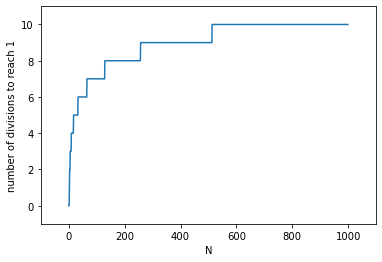

In [83]:
import matplotlib.pyplot as plt

def plot_list(values):
    plt.plot(values)
    plt.ylabel('number of divisions to reach 1')
    plt.xlabel('N')
    plt.margins(x=0.1, y=0.1)
    plt.show()
    
def num_div_to_reach_1(N):
    div_count = 0
    while N > 1:
        N /= 2
        div_count += 1
    return div_count

# Add your code below
num_div = []
for N in range(1000):
    result = num_div_to_reach_1(N)
    num_div.append(result)
    
plot_list(num_div)

### log<sub>2</sub>(N) = "The number of times we need to divide N by 2 to reach 1"

In [84]:
import math
print(math.log(64,2))

6.0


### Time Complexity Analysis of Binary Search

`def binary_search(values, target):                     
    range_start = 0                                    # 1
    range_end = len(values) - 1                        # 1
    while range_start < range_end:                     # log(N)
        range_middle = (range_end + range_start) // 2  # log(N)
        value = values[range_middle]                   # log(N)
        if value == target:                            # log(N)
            return range_middle                        # log(N)
        elif value < target:                           # log(N)
            range_start = range_middle + 1             # log(N)
        else:                                          # log(N)
            range_end = range_middle - 1               # log(N)
    if values[range_start] != target:                  # 1
        return -1                                      # 1
    return range_start                                 # 1`

### Summary:
* A new type of time complexity called logarithmic time complexity. This kind of complexity usually occurs when the algorithms successively divide the search space in two in order to find the answer.
* Binary search is a very efficient algorithm to find elements in sorted data.
* When a lot of queries need to be executed, the cost of preprocessing data to accelerate queries is usually worth it.